<a href="https://colab.research.google.com/github/tomohitom/Tennis_Game_Analysis/blob/main/select_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("/content/drive/MyDrive/match_stats/game_stats_2021.csv", encoding="cp932")
df["error"] = df["total_winning_point"] - df["ace"]
df["error_point_per"] = df["error"] / df["total_winning_point"]
x_col = []
for col in df.columns[2:]:
  if col == "url":
    continue
  x_col.append(col)
print(x_col)
X = df[x_col]
Y = df["result"]
df.head()

['1stserve_percentage', '1stserve_point', '2ndserve_point', '1stserve_rating', 'double_fault', 'double_fault/serve_game', 'serve_keep', 'total_winning_point', 'winning_percentage', 'ace', 'point/ace', 'game_streak', 'point_streak', 'error', 'error_point_per']


,name,result,1stserve_percentage,1stserve_point,2ndserve_point,1stserve_rating,double_fault,double_fault/serve_game,serve_keep,total_winning_point,winning_percentage,ace,point/ace,game_streak,point_streak,url,error,error_point_per
0,T.ベルッシ,0,61,60,44,36.60,3,0.272727,63.636364,60,44.117647,3,20.000000,2,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...,57,0.950000
1,T.モンテイロ,1,57,74,55,42.18,1,0.100000,90.000000,76,55.882353,2,38.000000,3,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...,74,0.973684
2,T.ポール,1,64,68,62,43.52,0,0.000000,88.888889,64,58.181818,5,12.800000,6,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...,59,0.921875
3,ナム ジソン,0,53,59,42,31.27,4,0.500000,50.000000,46,41.818182,2,23.000000,2,4,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...,44,0.956522
4,G.マジェル,1,71,77,44,54.67,3,0.230769,92.307692,96,54.237288,9,10.666667,3,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...,87,0.906250


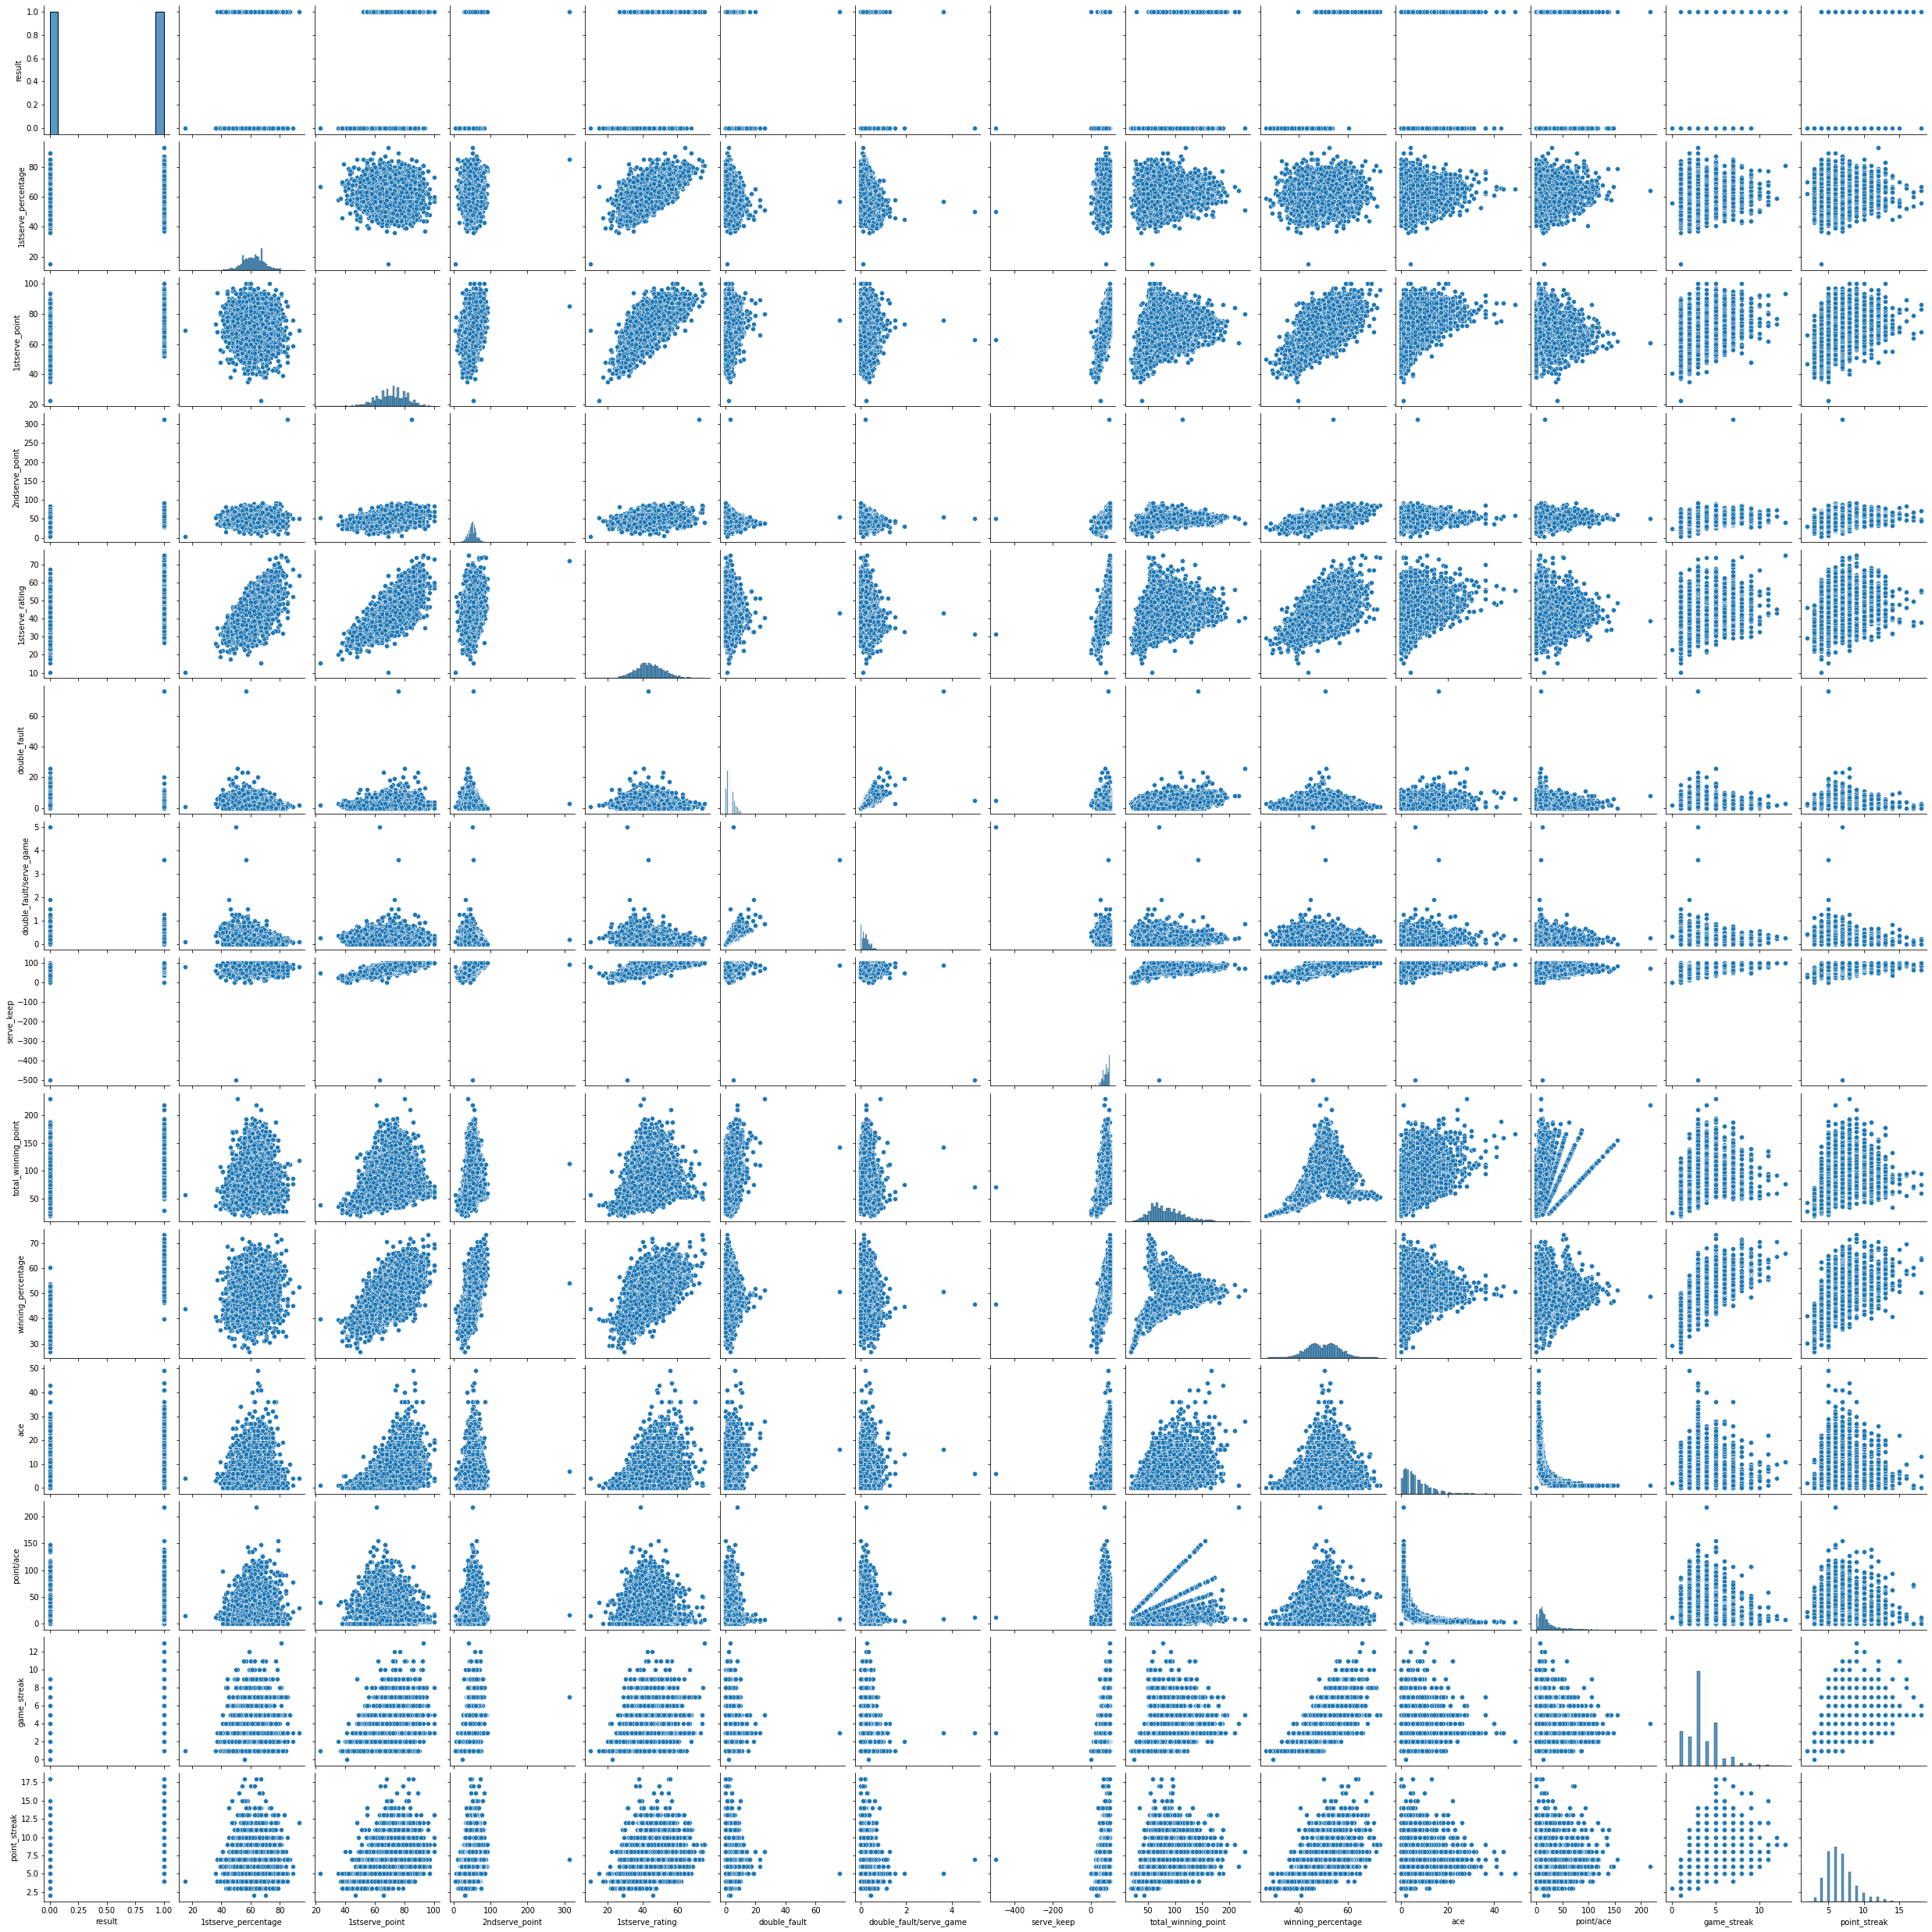

In [4]:
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

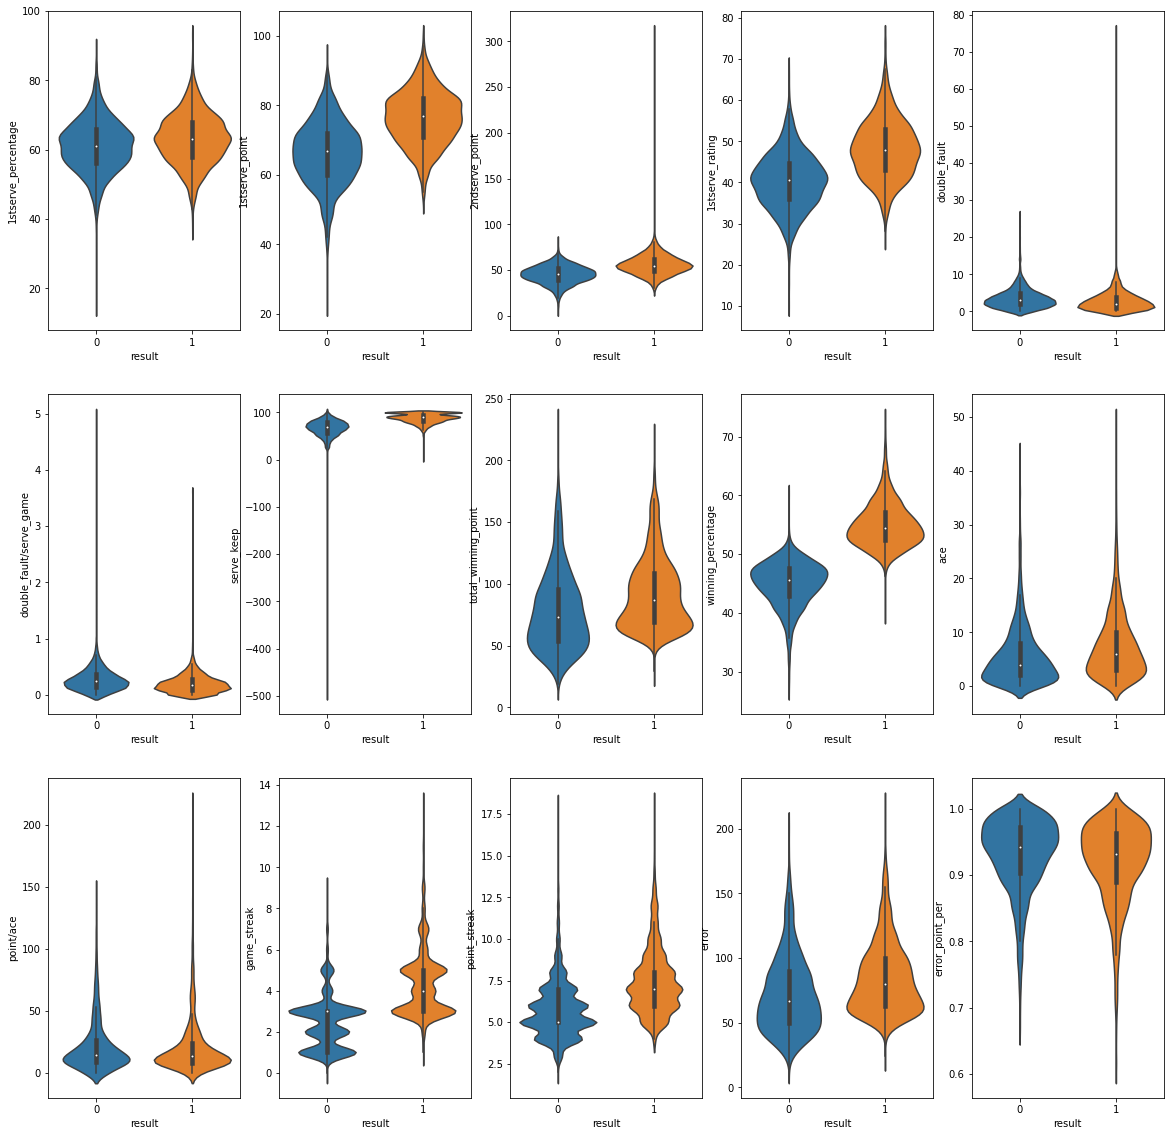

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
for i, col in enumerate(x_col):
  if col == "url":
    continue
  sns.violinplot(df["result"], df[col], ax=ax[divmod(i, 5)])

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X, Y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
df_2022 = pd.read_csv("/content/drive/MyDrive/match_stats/game_stats_2022.csv", encoding="cp932")
X_test = df_2022[x_col]
Y_test = df_2022["result"]
model.score(X_test, Y_test)

0.5004516711833785

[Text(0.5133928571428571, 0.9166666666666666, 'serve_keep <= 80.385\ngini = 0.5\nsamples = 6094\nvalue = [3047, 3047]'),
 Text(0.2857142857142857, 0.75, 'game_streak <= 3.5\ngini = 0.328\nsamples = 3150\nvalue = [2500, 650]'),
 Text(0.14285714285714285, 0.5833333333333334, 'total_winning_point <= 79.5\ngini = 0.155\nsamples = 2368\nvalue = [2167, 201]'),
 Text(0.07142857142857142, 0.4166666666666667, 'point_streak <= 9.5\ngini = 0.041\nsamples = 1542\nvalue = [1510, 32]'),
 Text(0.03571428571428571, 0.25, '1stserve_rating <= 60.33\ngini = 0.031\nsamples = 1515\nvalue = [1491, 24]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.029\nsamples = 1513\nvalue = [1491, 22]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.10714285714285714, 0.25, 'serve_keep <= 71.364\ngini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.125, 0.0833

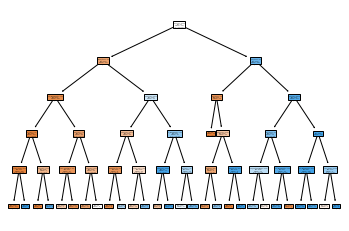

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names = x_col, filled=True)